## Neural Network from scratch 

In [1]:
import numpy as np
import pandas as pd

In [22]:
np.random.seed(42)

# to generate random inputs
def generate_data(num_samples=100):
    x1 = np.random.randint(1, 100, num_samples)
    x2 = np.random.randint(1, 100, num_samples)
    y = 0.3 * x1 + 0.7 * x2 + 100
    return x1, x2, y

x1, x2, y = generate_data(1000)
X = np.column_stack((x1, x2))
y = y.reshape(-1, 1)  # reshape y to be a column vector


In [23]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        
        # 1st layer weights and bias initiqalization
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))

        # 2nd layer weights and bias initialization
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # initialize learning rate 
        self.learning_rate = learning_rate

    # relu activation for the hidden layers
    def relu(self, z):
        return np.maximum(0, z)

    
    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        output = self.z2  # Linear output for regression
        return output

    def cost_funtion(self, output, y):
        #m = y.shape(1)
        cost = np.mean((output - y)**2)
        return cost
        
    def backward(self, X, y, output, cost):
        m = X.shape[0]

        # Calculate the error
        # L2 loss (mse = mean square error)
        #output_error = np.mean((output - y)**2)
        output_delta = output_error  # Derivative of linear activation

        a1_error = output_delta.dot(self.W2.T)
        a1_delta = a1_error * self.relu_derivative(self.z1)

        # Update weights and biases
        self.W2 -= self.learning_rate * self.a1.T.dot(output_delta) / m
        self.b2 -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True) / m
        self.W1 -= self.learning_rate * X.T.dot(a1_delta) / m
        self.b1 -= self.learning_rate * np.sum(a1_delta, axis=0, keepdims=True) / m

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(X)
            cost = self.cost_function(cost, y)
            self.backward(X, y, output)
            if (epoch + 1) % 100 == 0:
                loss = np.mean((output - y) ** 2)
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

    def predict(self, X):
        return self.forward(X)


In [24]:
# Parameters
input_size = 2
hidden_size = 5
output_size = 1
learning_rate = 0.001
epochs = 1000

# Initialize and train the neural network
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X, y, epochs)

# Make predictions
predictions = nn.predict(X)
print(predictions[:10])  # Print first 10 predictions


Epoch 100/1000, Loss: 8602.887684177298
Epoch 200/1000, Loss: 3475.3297491574076
Epoch 300/1000, Loss: 1593.363978089135
Epoch 400/1000, Loss: 902.4278341563195
Epoch 500/1000, Loss: 641.7479939675748
Epoch 600/1000, Loss: 550.8069518329834
Epoch 700/1000, Loss: 468.31052824164897
Epoch 800/1000, Loss: 503.8692536734504
Epoch 900/1000, Loss: 499.4632762381888
Epoch 1000/1000, Loss: 407.3472044162876
[[150.94367376]
 [150.94367381]
 [150.94367381]
 [150.94285352]
 [150.94366537]
 [150.94367381]
 [120.78653504]
 [150.71315172]
 [120.58444121]
 [120.58262076]]


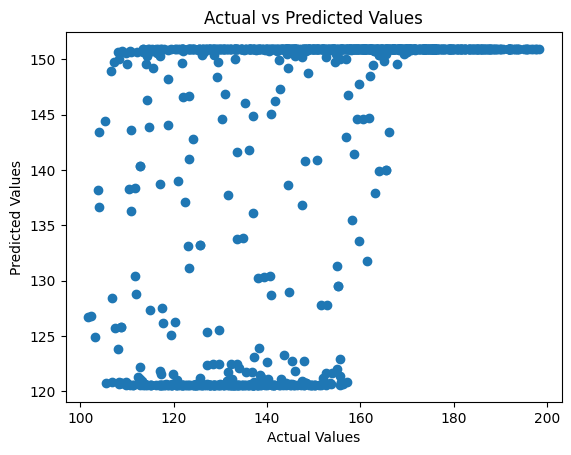

In [25]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
